In [1]:
!pip install rdkit

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import base64
import matplotlib.pyplot as plt
from io import BytesIO
%matplotlib inline
df = pd.read_csv('dataset_process.csv')
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Molecule')

import pandas as pd
import numpy as np
import seaborn as sn
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def generate_fpts(data):
    Mfpts = []
    for mol in tqdm(data):
        mfpt = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=256)
        Mfpts.append(mfpt)

    return np.array(Mfpts)
mfpts = generate_fpts(df.Molecule)

100%|██████████| 1691/1691 [00:00<00:00, 5389.43it/s]


In [2]:
morgan = pd.DataFrame(mfpts)
morgan

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,1,0,1,0,0,1
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1687,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1688,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1689,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [3]:
IC = pd.DataFrame(df['pIC50'], columns=['pIC50'])
IC

,pIC50
0,6.924453
1,6.732828
2,6.359519
3,6.392545
4,6.681937
...,...
1686,7.124939
1687,6.632644
1688,7.645892
1689,6.327902


In [5]:
index_train = [518,
35,
685,
408,
1089,
510,
22,
693,
343,
1687,
219,
783,
649,
857,
589,
238,
608,
48,
362,
531,
728,
679,
795,
1594,
369,
627,
933,
629,
421,
555,
771,
1276,
802,
1126,
595,
12,
1090,
764,
548,
218,
370,
1267,
823,
131,
1311,
570,
835,
1533,
100,
1375,
820,
502,
1066,
886,
1243,
517,
1541,
722,
997,
331,
186,
409,
425,
527,
1429,
1448,
640,
732,
415,
111,
735,
1532,
1024,
521,
1353,
1106,
298,
1647,
49,
488,
1476,
907,
471,
6,
1339,
212,
714,
1011,
1244,
705,
516,
120,
1461,
1327,
1494,
1187,
965,
1154,
1667,
313,
1265,
580,
309,
745,
1683,
358,
508,
198,
442,
632,
803,
875,
1074,
1196,
1430,
1100,
1583,
1669,
1205,
47,
1218,
1523,
797,
1139,
865,
756,
847,
147,
614,
106,
616,
46,
108,
499,
143,
1246,
449,
1156,
1012,
579,
672,
156,
357,
1414,
1256,
924,
1524,
233,
1050,
1095,
1557,
504,
1239,
1122,
173,
336,
539,
543,
146,
776,
726,
1404,
1141,
440,
1590,
380,
1469,
411,
215,
1326,
192,
1268,
1200,
1609,
590,
1297,
839,
1191,
395,
1500,
581,
262,
1361,
37,
429,
1300,
1233,
838,
140,
655,
851,
345,
1282,
251,
1038,
563,
205,
644,
1634,
501,
1085,
562,
1456,
801,
410,
888,
1605,
1096,
706,
21,
178,
133,
782,
630,
1042,
913,
398,
1336,
1234,
387,
93,
392,
142,
187,
208,
1445,
397,
624,
1552,
748,
990,
1460,
814,
1296,
361,
68,
1301,
1406,
424,
806,
845,
267,
1581,
1228,
1415,
1373,
330,
278,
926,
812,
697,
1070,
375,
1632,
284,
1394,
1413,
772,
729,
769,
1371,
929,
1028,
852,
1229,
603,
1645,
1555,
327,
1502,
237,
1499,
363,
1603,
650,
234,
141,
648,
269,
1649,
1162,
937,
195,
1013,
1117,
1462,
1662,
1257,
794,
294,
1014,
1658,
691,
301,
461,
698,
1626,
701,
299,
107,
1600,
1053,
1030,
889,
51,
228,
1592,
1212,
681,
793,
659,
1576,
1531,
971,
1392,
1069,
1688,
1280,
1332,
443,
52,
256,
751,
1561,
1279,
647,
786,
1202,
1288,
557,
689,
637,
544,
300,
1306,
1044,
628,
882,
1231,
1146,
185,
1388,
1266,
758,
32,
1530,
514,
684,
1614,
41,
1086,
651,
943,
202,
591,
1425,
804,
207,
877,
1359,
161,
642,
987,
1252,
18,
1025,
568,
670,
988,
1075,
1426,
1023,
1103,
189,
273,
1298,
1155,
2,
836,
1642,
130,
112,
1690,
917,
439,
1145,
433,
447,
610,
574,
1457,
850,
721,
279,
96,
773,
1198,
993,
382,
226,
1333,
64,
1487,
320,
859,
287,
457,
1566,
177,
1376,
484,
1405,
1650,
1639,
1334,
1577,
1681,
1091,
861,
26,
1522,
638,
785,
497,
918,
635,
1527,
713,
538,
957,
417,
1635,
1071,
910,
1183,
546,
275,
1556,
203,
1133,
1098,
1464,
1188,
1466,
1529,
938,
573,
479,
9,
487,
1147,
221,
152,
306,
1420,
540,
403,
564,
75,
1181,
1137,
1123,
1214,
1325,
144,
575,
1132,
777,
1585,
1078,
631,
1161,
456,
1345,
376,
901,
312,
1486,
1209,
526,
1320,
547,
266,
1315,
427,
366,
946,
244,
1673,
879,
56,
639,
730,
712,
936,
1215,
285,
1482,
184,
125,
963,
853,
7,
1111,
463,
942,
788,
1396,
1410,
496,
1374,
951,
666,
1151,
844,
1035,
753,
860,
452,
1348,
1160,
325,
545,
259,
20,
755,
124,
676,
866,
127,
717,
1510,
551,
290,
264,
1492,
1261,
654,
458,
1682,
1399,
293,
1080,
1672,
289,
349,
1046,
973,
1615,
817,
1568,
1073,
881,
385,
969,
423,
54,
1477,
29,
1262,
585,
831,
277,
1459,
530,
626,
1444,
258,
914,
966,
8,
83,
925,
69,
1295,
588,
609,
437,
1536,
1167,
104,
420,
493,
599,
577,
265,
169,
16,
241,
406,
669,
1079,
695,
1619,
586,
1628,
1378,
44,
657,
42,
1385,
342,
1528,
1006,
1227,
606,
483,
1309,
955,
819,
1516,
964,
28,
1186,
542,
1644,
1496,
232,
1034,
1360,
1540,
1259,
1545,
1208,
1622,
746,
346,
381,
355,
710,
1599,
1040,
731,
707,
1513,
1350,
532,
444,
752,
1245,
840,
1567,
741,
1286,
1481,
529,
792,
558,
1116,
1219,
136,
1018,
1175,
373,
229,
583,
225,
405,
727,
85,
1663,
876,
1149,
1052,
1587,
450,
257,
607,
1463,
45,
1130,
921,
940,
567,
734,
1447,
958,
1593,
509,
1335,
829,
1665,
1539,
477,
799,
1118,
1389,
1512,
1677,
1107,
1240,
86,
222,
288,
1390,
475,
1652,
1553,
1565,
1124,
976,
920,
1088,
1408,
1621,
554,
641,
135,
413,
324,
986,
1387,
1172,
1473,
618,
155,
869,
959,
371,
166,
1238,
908,
15,
1661,
1273,
1163,
736,
896,
1402,
593,
700,
1564,
337,
1000,
506,
718,
1189,
981,
1504,
1643,
94,
30,
842,
1099,
1087,
1003,
70,
1210,
668,
1417,
1152,
399,
656,
92,
350,
724,
613,
454,
968,
1442,
1520,
365,
1041,
1058,
1432,
227,
394,
249,
1362,
723,
1440,
464,
1443,
1171,
1248,
948,
1138,
1595,
779,
388,
90,
396,
55,
912,
674,
1354,
849,
1064,
1659,
431,
780,
1054,
253,
1543,
95,
1610,
690,
975,
1488,
1249,
634,
1004,
1631,
1174,
904,
1474,
1185,
1026,
1544,
992,
738,
1511,
113,
1654,
1285,
999,
451,
556,
99,
1478,
1293,
528,
1611,
870,
1275,
841,
478,
897,
1221,
725,
223,
316,
826,
1453,
671,
821,
1093,
995,
1222,
596,
1467,
445,
1558,
359,
939,
636,
716,
1263,
597,
1471,
1048,
1159,
873,
305,
565,
871,
1140,
1176,
448,
767,
1253,
1115,
1446,
353,
119,
825,
1519,
1291,
412,
1323,
1419,
584,
128,
1679,
1625,
536,
872,
188,
71,
204,
1602,
1393,
1617,
3,
1640,
561,
553,
1065,
1412,
1646,
38,
170,
617,
24,
1518,
1216,
1051,
1217,
53,
472,
377,
1247,
694,
1281,
1352,
953,
1666,
1237,
216,
1381,
970,
1305,
1010,
1142,
283,
65,
145,
367,
1498,
1606,
1579,
50,
808,
952,
1213,
1582,
1274,
391,
210,
833,
902,
1225,
974,
416,
200,
1113,
1437,
883,
980,
1269,
1479,
260,
1397,
1045,
1465,
982,
132,
1517,
1049,
1105,
1366,
1134,
905,
515,
867,
805,
1451,
486,
295,
462,
592,
1,
255,
165,
1165,
915,
1337,
1651,
1304,
891,
1061,
1612,
263,
1173,
620,
1250,
661,
418,
1347,
150,
1039,
522,
1192,
1029,
31,
468,
386,
744,
954,
245,
1549,
1423,
1180,
432,
268,
550,
1484,
1538,
1330,
1102,
784,
1179,
270,
404,
1114,
587,
927,
303,
611,
893,
761,
1434,
1501,
878,
615,
14,
1470,
1194,
1255,
326,
1449,
511,
214,
302,
737,
334,
11,
766,
1596,
469,
291,
956,
311,
231,
537,
1570,
680,
230,
315,
34,
57,
1506,
868,
243,
1418,
1489,
491,
711,
1016,
1199,
703,
747,
282,
0,
84,
828,
763,
1554,
646,
1493,
459,
10,
625,
796,
822,
660,
1686,
1563,
1675,
1242,
328,
1284,
1569,
1119,
126,
699,
77,
129,
436,
193,
884,
500,
1616,
73,
1403,
434,
117,
17,
1452,
1037,
1063,
378,
13,
1021,
1618,
967,
1059,
931,
633,
1356,
535,
384,
1148,
621,
898,
360,
175,
344,
675,
932,
27,
314,
453,
1344,
1630,
1157,
248,
916,
1201,
211,
1573,
1104,
1542,
1458,
1551,
507,
824,
1537,
1480,
1377,
1204,
1036,
512,
118,
1441,
1211,
1168,
1559,
890,
1391,
815,
960,
176,
5,
1077,
1624,
1657,
619,
236,
523,
435,
1055,
1623,
807,
1358,
292,
1170,
1507,
1076,
332,
1302,
978,
1047,
922,
103,
1303,
892,
594,
818,
286,
1129,
749,
182,
33,
505,
348,
393,
297,
199,
742,
333,
476,
80,
401,
1535,
213,
1197,
1131,
1562,
1019,
692,
402,
323,
739,
180,
379,
569,
151,
495,
281,
235,
338,
903,
1580,
652,
217,
149,
1226,
1641,
1575,
687,
572,
66,
460,
490,
1604,
1270,
224,
911,
1032,
389,
809,
930,
190,
1324,
246,
846,
874,
319,
1251,
1668,
1664,
250,
612,
743,
1648,
534,
549,
465,
1022,
813,
1097,
1678,
1534,
677,
645,
989,
1424,
961,
854,
492,
171,
686,
1547,
123,
663,
1060,
1588,
762,
1409,
1491,
122,
154,
1368,
1365,
1258,
827,
643,
1158,
1571,
23,
1342,
467,
1515,
664,
109,
81,
482,
179,
720,
72,
811,
768,
1108,
1292,
702,
1636,
665,
909,
1472,
781,
1633,
667,
1166,
1190,
422,
1382,
559,
390,
1598,
895,
1321,
352,
254,
1505,
1112,
1121,
60,
276,
1206,
76,
304,
1150,
1629,
340,
322,
1169,
1082,
1308,
101,
163,
1182,
407,
1613,
1436,
578,
158,
1431,
1497,
1092,
1062,
1027,
1015,
800,
1638,
1110,
148,
708,
43,
1656,
1548,
78,
115,
1428,
116,
541,
696,
310,
105,
40,
470,
709]
indice_train1 = [380,  378,  379, 1187, 1012, 1200, 1191, 1605, 1070, 1688, 1280, 1025,
       1487, 1147, 1111, 1568,  914, 1644, 1545, 1663,   86, 1390,  227, 1443,
       1174, 1474, 1093, 1640, 1518, 1305, 1029, 1194,  302,  334, 1570, 1686,
        434, 1059, 1104, 1641, 1664, 1588, 1092]
index_train_new1 = [x for x in index_train if x not in indice_train1]
len(index_train_new1)

1309

In [6]:
index_test = [848,
945,
984,
1379,
351,
473,
1383,
600,
1331,
280,
341,
1125,
503,
1674,
832,
1278,
36,
1005,
1357,
261,
1589,
1033,
1193,
979,
1689,
110,
983,
810,
1084,
1343,
1608,
455,
962,
19,
719,
1680,
372,
1671,
1550,
1427,
1490,
1136,
1407,
1081,
1398,
318,
944,
62,
843,
1289,
1299,
317,
830,
481,
885,
1177,
159,
1521,
623,
138,
174,
1057,
383,
67,
1128,
194,
1574,
1223,
1264,
252,
59,
61,
1341,
513,
1067,
1031,
1370,
480,
97,
167,
181,
489,
368,
1421,
1684,
1002,
1307,
335,
682,
1043,
58,
474,
935,
164,
864,
494,
1236,
426,
533,
74,
1586,
604,
757,
1572,
1384,
114,
949,
560,
1235,
856,
1313,
899,
247,
900,
1072,
1340,
653,
774,
1143,
1372,
658,
1322,
1272,
1416,
1314,
928,
1101,
715,
519,
39,
923,
1017,
89,
347,
1435,
1329,
1207,
862,
994,
157,
1294,
571,
82,
1127,
1637,
950,
87,
296,
1395,
1627,
1056,
98,
789,
1319,
1007,
1509,
172,
1450,
1009,
1676,
1591,
1260,
1475,
754,
168,
1386,
430,
816,
220,
1601,
1349,
1203,
1310,
919,
1578,
525,
1411,
1483,
704,
400,
520,
790,
1195,
1653,
1144,
206,
414,
191,
1422,
1485,
91,
733,
765,
880,
566,
274,
1020,
1290,
1495,
998,
1454,
775,
1254,
605,
239,
1400,
683,
894,
887,
137,
209,
1184,
1241,
1455,
1094,
1153,
196,
1328,
1526,
1660,
1230,
947,
321,
419,
1401,
374,
770,
858,
1584,
428,
582,
271,
197,
1503,
1001,
1597,
787,
1317,
240,
991,
601,
25,
622,
79,
1109,
242,
1468,
688,
102,
1655,
972,
308,
834,
466,
1120,
1685,
1380,
201,
1433,
1338,
1438,
1560,
778,
1232,
837,
855,
441,
121,
1367,
1620,
63,
1008,
1363,
339,
1670,
153,
1439,
1287,
863,
1135,
934,
1068,
364,
162,
1277,
759,
1351,
598,
1514,
134,
941,
1607,
985,
977,
354,
1525,
662,
798,
996,
906,
356,
750,
1346,
485,
160,
498,
552,
1546,
88,
760,
1164,
307,
438,
1508,
740,
272,
673,
576,
1312,
602,
139,
1355,
1178,
329,
183,
1224,
1316,
1220,
1364,
446,
678,
4,
1369,
1318,
524,
1283,
1271,
791,
1083]
indice_test = [1586, 1101, 1127, 1495, 1655, 1178,1033,1357,1094,1450
]
index_test_new = [x for x in index_test if x not in indice_test]
len(index_test_new)

329

        CROSS VALIDATION    

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score

X = morgan
y = IC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Define the parameter grid for SVR
param_grid = {
    'C': [0.01,0.1,1,5,10],
    'epsilon': [0.01,0.05, 0.1,0.5,1],
    'kernel': ['rbf','poly','linear']
}

# Create the SVR model
svr = SVR()

# Perform grid search using cross-validation
grid_search = GridSearchCV(svr, param_grid, scoring='r2', cv = 3, verbose = 2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best SVR model
best_svr = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_test = best_svr.predict(X_test)
y_pred_train = best_svr.predict(X_train)

# Calculate R-squared scores
print("R-squared on test set:", r2_score(y_test, y_pred_test))
print("R-squared on train set:", r2_score(y_train, y_pred_train))

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.01, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.01, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=0.01, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ................C=0.01, epsilon=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, epsilon=0.05, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.01, epsilon=0.05, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.01, epsilon=0.0

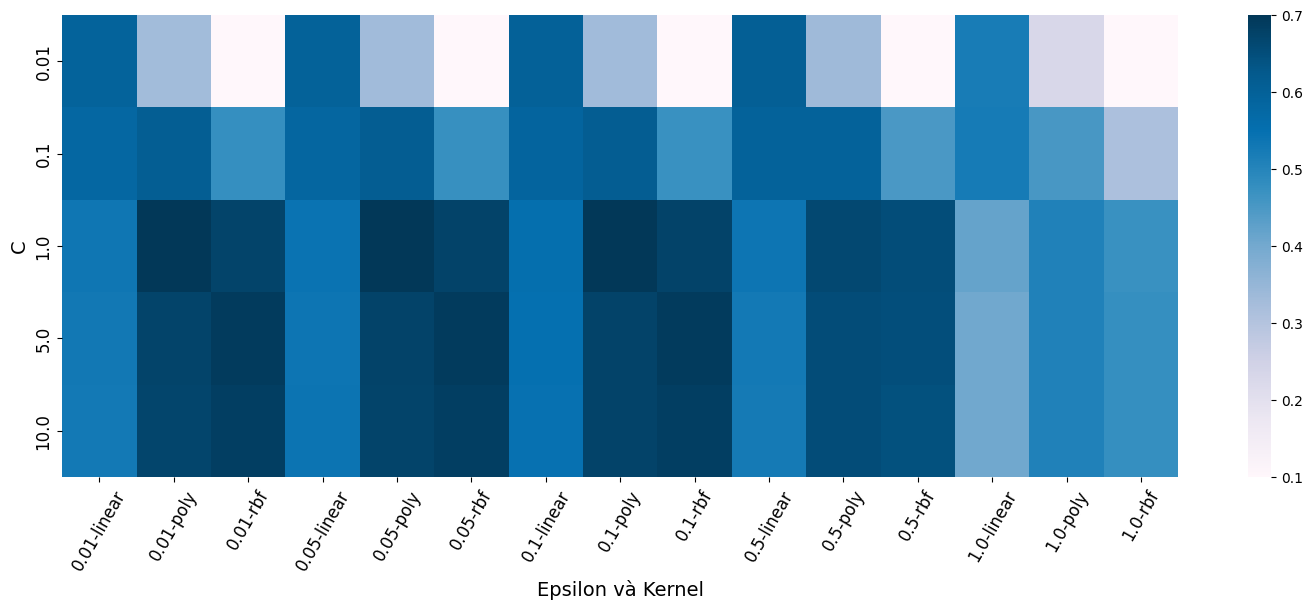

In [249]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Get the grid search results
results = grid_search.cv_results_

# Extract the parameters and scores
param_C = results['param_C'].data
param_epsilon = results['param_epsilon'].data
param_kernel = results['param_kernel'].data
mean_test_score = results['mean_test_score']

# Create a dataframe from the data
data = pd.DataFrame({'C': param_C, 'epsilon': param_epsilon, 'kernel': param_kernel, 'score': mean_test_score})

# Pivot the dataframe to create a matrix for the heatmap
matrix = data.pivot_table(index='C', columns=['epsilon', 'kernel'], values='score')

# Create the heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(matrix, cmap='PuBu', cbar=True, fmt='.10f', vmin = 0.1, vmax = 0.7)

# Set labels and title
plt.xlabel('Epsilon và Kernel', fontsize = 14)
plt.ylabel('C', fontsize = 14)
plt.xticks(rotation=60, fontsize = 12)
plt.yticks( fontsize = 12)
# plt.title('Kết Grid Search')

# Display the plot
plt.show()

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score

X = morgan
y = IC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Define the parameter grid for SVR
param_grid1 = {
    'C': [1,2,3,4,5,6,7,8,9,10],
    'epsilon': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1],
    'kernel': ['poly','rbf']
}

# Create the SVR model
svr = SVR()

# Perform grid search using cross-validation
grid_search1 = GridSearchCV(svr, param_grid1, scoring='r2', cv = 3, verbose = 2)

# Fit the grid search to the training data
grid_search1.fit(X_train, y_train)

# Get the best SVR model
best_svr1 = grid_search1.best_estimator_

# Make predictions on the test set using the best model
y_pred_test = best_svr1.predict(X_test)
y_pred_train = best_svr1.predict(X_train)

# Calculate R-squared scores
print("R-squared on test set:", r2_score(y_test, y_pred_test))
print("R-squared on train set:", r2_score(y_train, y_pred_train))

# Get the best parameters
print("Best parameters:", grid_search1.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END .....................C=1, epsilon=0.01, kernel=poly; total time=   0.1s
[CV] END .....................C=1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=1, epsilon=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, epsilon=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=1, epsilon=0.02, kernel=poly; total time=   0.0s
[CV] END .....................C=1, epsilon=0.02, kernel=poly; total time=   0.0s
[CV] END .....................C=1, epsilon=0.02, kernel=poly; total time=   0.0s
[CV] END ......................C=1, epsilon=0.02, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, epsilon=0.02, kernel=rbf; total time=   0.1s
[CV] END ......................C=1, epsilon=0.

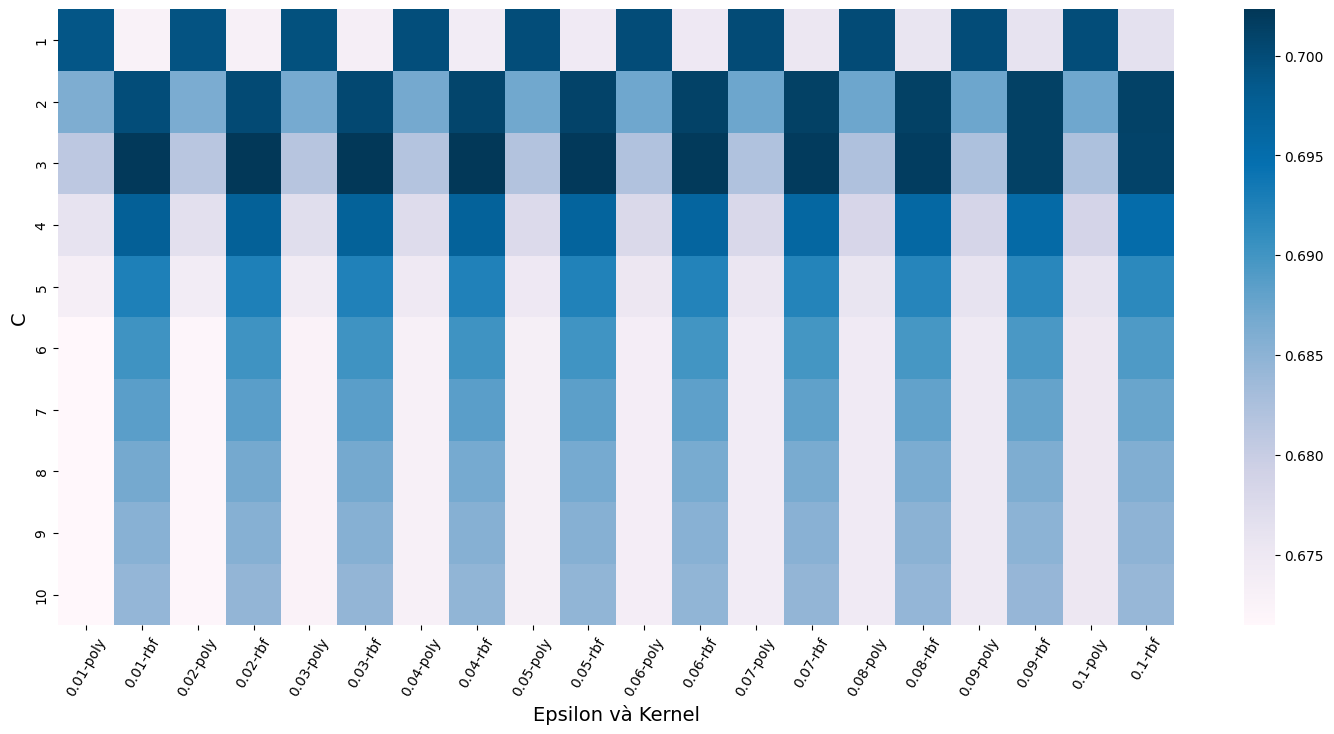

In [253]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Get the grid search results
results = grid_search1.cv_results_

# Extract the parameters and scores
param_C = results['param_C'].data
param_epsilon = results['param_epsilon'].data
param_kernel = results['param_kernel'].data
mean_test_score = results['mean_test_score']

# Create a dataframe from the data
data = pd.DataFrame({'C': param_C, 'epsilon': param_epsilon, 'kernel': param_kernel, 'score': mean_test_score})

# Pivot the dataframe to create a matrix for the heatmap
matrix = data.pivot_table(index='C', columns=['epsilon', 'kernel'], values='score')

# Create the heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(matrix, cmap='PuBu', cbar=True, fmt='.8f')

# Set labels and title
plt.xlabel('Epsilon và Kernel', fontsize = 14)
plt.ylabel('C', fontsize = 14)
plt.xticks(rotation=60)
# plt.title('Kết Grid Search')

# Display the plot
plt.show()

In [255]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, expon
import numpy as np
from sklearn.svm import SVR

baseline_svm = SVR()
model_params = {
    'C': uniform(loc=3, scale=1),
    'kernel': [ 'rbf'],
    'epsilon': uniform(loc=0.01, scale=0.1)
}
randomized_search = RandomizedSearchCV(estimator=baseline_svm, param_distributions=model_params, n_iter=100 , verbose = 2,
                                    cv=3)

randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END C=3.639306789656641, epsilon=0.03855526457673199, kernel=rbf; total time=   0.1s
[CV] END C=3.639306789656641, epsilon=0.03855526457673199, kernel=rbf; total time=   0.1s
[CV] END C=3.639306789656641, epsilon=0.03855526457673199, kernel=rbf; total time=   0.1s
[CV] END C=3.2560480589049936, epsilon=0.028293361896529257, kernel=rbf; total time=   0.1s
[CV] END C=3.2560480589049936, epsilon=0.028293361896529257, kernel=rbf; total time=   0.1s
[CV] END C=3.2560480589049936, epsilon=0.028293361896529257, kernel=rbf; total time=   0.1s
[CV] END C=3.858554666549503, epsilon=0.024981696916066057, kernel=rbf; total time=   0.1s
[CV] END C=3.858554666549503, epsilon=0.024981696916066057, kernel=rbf; total time=   0.1s
[CV] END C=3.858554666549503, epsilon=0.024981696916066057, kernel=rbf; total time=   0.1s
[CV] END C=3.2487794976831728, epsilon=0.02523239072162037, kernel=rbf; total time=   0.1s
[CV] END C=3.24877949768317

RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023A039ACAD0>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000023A02E80750>,
                                        'kernel': ['rbf']},
                   verbose=2)

In [256]:
print("Random Score:", randomized_search.best_params_)
print("Random Score:", randomized_search.best_score_)

Random Score: {'C': 3.0335571516972455, 'epsilon': 0.02478760995246643, 'kernel': 'rbf'}
Random Score: 0.7022084294357008


In [257]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score

X = morgan
y = IC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Define the parameter grid for SVR
param_grid1 = {
    'C': [3.0335571516972455],
    'epsilon': [0.02478760995246643],
    'kernel': ['rbf']
}

# Create the SVR model
svr = SVR()

# Perform grid search using cross-validation
grid_search1 = GridSearchCV(svr, param_grid1, scoring='r2', cv = 10, verbose = 2)

# Fit the grid search to the training data
grid_search1.fit(X_train, y_train)

# Get the best SVR model
best_svr1 = grid_search1.best_estimator_

# Make predictions on the test set using the best model
y_pred_test = best_svr1.predict(X_test)
y_pred_train = best_svr1.predict(X_train)

# Calculate R-squared scores
print("R-squared on test set:", r2_score(y_test, y_pred_test))
print("R-squared on train set:", r2_score(y_train, y_pred_train))

# Get the best parameters
print("Best parameters:", grid_search1.best_params_)
print(grid_search1.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.2s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.2s
R-squared on test set: 0.7603

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
import numpy as np


X = morgan
y = IC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

X_train_new= X_train.loc[X_train.index.isin(index_train_new1)]
y_train_new= y_train.loc[y_train.index.isin(index_train_new1)]


X_test_new = X_test.loc[X_test.index.isin(index_test_new)]
y_test_new = y_test.loc[y_test.index.isin(index_test_new)]

svr = SVR(C = 3.0335571516972455, epsilon = 0.02478760995246643, kernel='rbf')

svr.fit(X_train_new, y_train_new)
y_pred_test1= svr.predict(X_test_new)
y_pred_train = svr.predict(X_train_new)

print("R-squared on test set:", r2_score(y_test_new, y_pred_test1))
print("R-squared on train set:",r2_score(y_train_new, y_pred_train))

R-squared on test set: 0.8255549377969342
R-squared on train set: 0.9920768567348833


In [5]:
from sklearn.model_selection import train_test_split
X = morgan
y = IC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)
y_test_new = y_test.loc[y_test.index.isin(index_test_new)]

In [8]:
y_test_new.to_csv('y_test.csv')

In [12]:
from scipy.stats import mannwhitneyu
statistic, p_value =mannwhitneyu(y_train.pIC50, y_test_new.pIC50, alternative='two-sided')
print("Wilcoxon statistic:", statistic)
print("P-value:", p_value)

Wilcoxon statistic: 219339.0
P-value: 0.6977988592572324


In [431]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test_new, y_pred_test1, squared=False)
rms

0.47924708771539665

In [432]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_new, y_pred_test1)
mae

0.3720451923149242

In [296]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score

X = morgan
y = IC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Define the parameter grid for SVR
param_grid1 = {
    'C': [3.0335571516972455],
    'epsilon': [0.02478760995246643],
    'kernel': ['rbf']
}

# Create the SVR model
svr = SVR()

# Perform grid search using cross-validation
grid_search1 = GridSearchCV(svr, param_grid1, scoring='r2', cv = 10, verbose = 2)

# Fit the grid search to the training data
grid_search1.fit(X_train_new, y_train_new)

# Get the best SVR model
best_svr1 = grid_search1.best_estimator_

# Make predictions on the test set using the best model
y_pred_test = best_svr1.predict(X_test)
y_pred_train = best_svr1.predict(X_train_new)

# Calculate R-squared scores
print("R-squared on test set:", r2_score(y_test, y_pred_test))
print("R-squared on train set:", r2_score(y_train_new, y_pred_train))

# Get the best parameters
print("Best parameters:", grid_search1.best_params_)
print(grid_search1.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.2s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.2s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
[CV] END C=3.0335571516972455, epsilon=0.02478760995246643, kernel=rbf; total time=   0.1s
R-squared on test set: 0.7444

        AD

In [21]:
# leverage_train = np.diag(X_train@ np.linalg.pinv(X_train.T @ X_train) @ X_train.T)
leverage_test = np.diag(X_test_new@ np.linalg.pinv(X_train_new.T @ X_train_new) @ X_test_new.T)

In [24]:
y_train_new['pred'] = y_pred_train
# y_train['residual'] = y_train['pIC50'] - y_train['pred']
# y_train['squared'] = y_train['residual']**2
# mse_train = y_train['squared'].sum()/(len(y_train['squared']))
# y_train['leverage'] = leverage_train
# y_train['standard'] = y_train['residual']/(mse_train)**0.5

y_test_new['pred'] = y_pred_test1
y_test_new['residual'] = y_test_new['pIC50'] - y_test_new['pred']
y_test_new['squared'] = y_test_new['residual']**2
mse_test = y_test_new['squared'].sum()/(len(y_test_new['squared']))
y_test_new['leverage'] = leverage_test
y_test_new['standard'] = y_test_new['residual']/(mse_test)**0.5

In [355]:
y_train.to_csv('y_train.csv')

In [429]:
min_value1 = y_train['standard'].min()
max_value1 = y_train['standard'].max()

min_value2 = y_train['leverage'].min()
max_value2 = y_train['leverage'].max()


# min_value3 = y_test['standard'].min()
# max_value3 = y_test['standard'].max()

# min_value4 = y_test['leverage'].min()
# max_value4 = y_test['leverage'].max()



print(min_value1, max_value1, min_value2, max_value2)
# print(min_value3, max_value3, min_value4, max_value4)

-8.262550205561318 10.435527165543608 0.0704027524549092 0.7130341293048611


In [428]:
elements = []
elements1 = []

for i, element in enumerate(y_train['leverage']):
    if element > 0.570266 or element < 0:
        elements.append(element)

for j, element1 in enumerate(y_train['standard']):
    if element1 >= 3 or element1 <= -3 :
        elements1.append(element1)

a = y_train[y_train.leverage.isin(elements)]
b = y_train[y_train.standard.isin(elements1)]

c = pd.concat([a,b], axis = 0)
c = c.drop_duplicates()
b.shape

(40, 6)

In [291]:
y_test_new.to_csv('y_test.csv')

In [292]:
y_train_new.to_csv('y_train.csv')

In [345]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

def perform_y_scrambling(model, X_train, X_val, Y_train, Y_val, num_iterations=100):
   original_score = model.fit(X_train, Y_train).score(X_val, Y_val)
   original_r2 = r2_score(Y_val, model.predict(X_val))
   print("Original Model Score:", original_score)
   print("Original R^2:", original_r2)

   scores = []
   r2_values = []
   for i in range(num_iterations):
      Y_train_scrambled = shuffle(Y_train)  # Shuffle the target variable
      score = np.mean(cross_val_score(model, X_train, Y_train_scrambled, cv=10, scoring='r2', verbose = 2))
      r2 = r2_score(Y_val, model.predict(X_val))
      scores.append(score)
      r2_values.append(r2)

   avg_score = np.mean(scores)
   avg_r2 = np.mean(r2_values)
   print("Y Scrambling Average Score:", avg_score)
   print("Y Scrambling Average R^2:", avg_r2)

   print(scores)
   print(r2_values)

In [346]:
perform_y_scrambling(svr, X_train_new, X_train_new, y_train_new, y_train_new, num_iterations=100)

Original Model Score: 0.9920768567348833
Original R^2: 0.9920768567348833
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END ..........................

In [347]:
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

def perform_y_scrambling_r2(model, X_train, X_val, Y_train, Y_val, num_iterations=10):
   original_score = model.fit(X_train, Y_train).score(X_val, Y_val)
   original_r2 = r2_score(Y_val, model.predict(X_val))
   print("Original Model Score:", original_score)
   print("Original R^2:", original_r2)

   scores = []

   for i in range(num_iterations):
      Y_train_scrambled = shuffle(Y_train)  # Shuffle the target variable
      model.fit(X_train, Y_train_scrambled)  # Retrain the model on scrambled data
      score = model.score(X_val, Y_val)
      scores.append(score)

   avg_score = np.mean(scores)

   print("Y Scrambling Average Score:", avg_score)

   print(scores)

In [348]:
perform_y_scrambling_r2(svr, X_train_new, X_train_new, y_train_new, y_train_new, num_iterations=100)

Original Model Score: 0.9920768567348833
Original R^2: 0.9920768567348833
Y Scrambling Average Score: -0.48702103433724026
[-0.5422730736513539, -0.5048670782892459, -0.512700443493239, -0.6246843603203407, -0.4083477024348725, -0.566316254201676, -0.506489178773349, -0.4764544336848364, -0.5474843108094121, -0.4237940375434477, -0.41465924233952767, -0.4471560363638063, -0.5694094649362886, -0.46827148314211686, -0.4478090706263236, -0.3446986703653685, -0.5579178310557431, -0.4646419255413019, -0.4232990650171351, -0.5625259840516263, -0.556650069379486, -0.5340589014862915, -0.44654232274566197, -0.4226517154941245, -0.467360692023036, -0.40364604591151476, -0.5160506819765931, -0.6348914577204645, -0.5056848826426719, -0.43197455850854505, -0.5086684639183372, -0.4876005783432589, -0.502648736152562, -0.40982535442989576, -0.5132404592325635, -0.4991670007542319, -0.5510182965577475, -0.4477139045032954, -0.4812199247624709, -0.519365417437835, -0.5863686441825089, -0.4129813934262

In [19]:
y_train_train = pd.read_csv('y_train.csv')
y_train_train

,Unnamed: 0,pIC50,pred,residual,squared,leverage,standard
0,518,5.962574,5.987746,-0.025173,0.000634,0.163469,-0.103236
1,35,7.519993,7.495108,0.024885,0.000619,0.106330,0.102058
2,685,5.886057,5.861097,0.024960,0.000623,0.201541,0.102363
3,408,4.489991,4.514773,-0.024782,0.000614,0.187891,-0.101632
4,1089,8.397940,8.372904,0.025036,0.000627,0.150075,0.102676
...,...,...,...,...,...,...,...
1304,310,8.769551,8.744296,0.025255,0.000638,0.132509,0.103573
1305,105,7.047208,7.071842,-0.024635,0.000607,0.125765,-0.101029
1306,40,7.790485,7.765500,0.024985,0.000624,0.107193,0.102465
1307,470,5.191789,5.167191,0.024598,0.000605,0.171032,0.100877


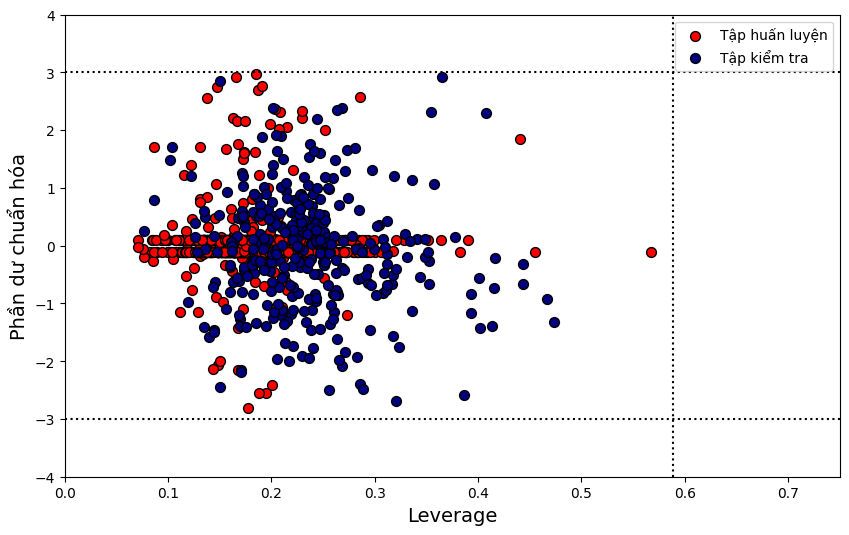

In [384]:
import matplotlib.pyplot as plt

x_axis = y_train_train['leverage']
y_axis = y_train_train['standard']

x_axis_1 = y_test_new['leverage']
y_axis_1 = y_test_new['standard']
'''
x_axis_2 = y_test2['leverage']
y_axis_2 = y_test2['standard']

x_axis_3 = y_blind_new['leverage']
y_axis_3 = y_blind_new['standard']
'''
plt.figure(figsize=(10, 6))

plt.scatter(x_axis, y_axis, color = 'red', label = 'Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(x_axis_1, y_axis_1, color = 'navy', label = 'Tập kiểm tra', marker='o', s=50, edgecolors='black')
# plt.scatter(x_axis_2, y_axis_2, color = 'orange', label = 'Test 2')
# plt.scatter(x_axis_3, y_axis_3, color = 'darkorange', label = 'Test 3')

plt.xlabel('Leverage', fontsize = 14)
plt.ylabel('Phần dư chuẩn hóa', fontsize =14)
# plt.title('Applicability domain')
plt.xlim(0, 0.75)  # Set the x-axis limits
plt.ylim(-4, 4)  # Set the y-axis limits
plt.axhline(y = 3, color='black', linestyle='dotted')
plt.axhline(y = -3, color='black', linestyle='dotted')
plt.axvline(x =0.5889999, color='black', linestyle='dotted')
legend = plt.legend( loc='upper right', fontsize=10)
plt.show()

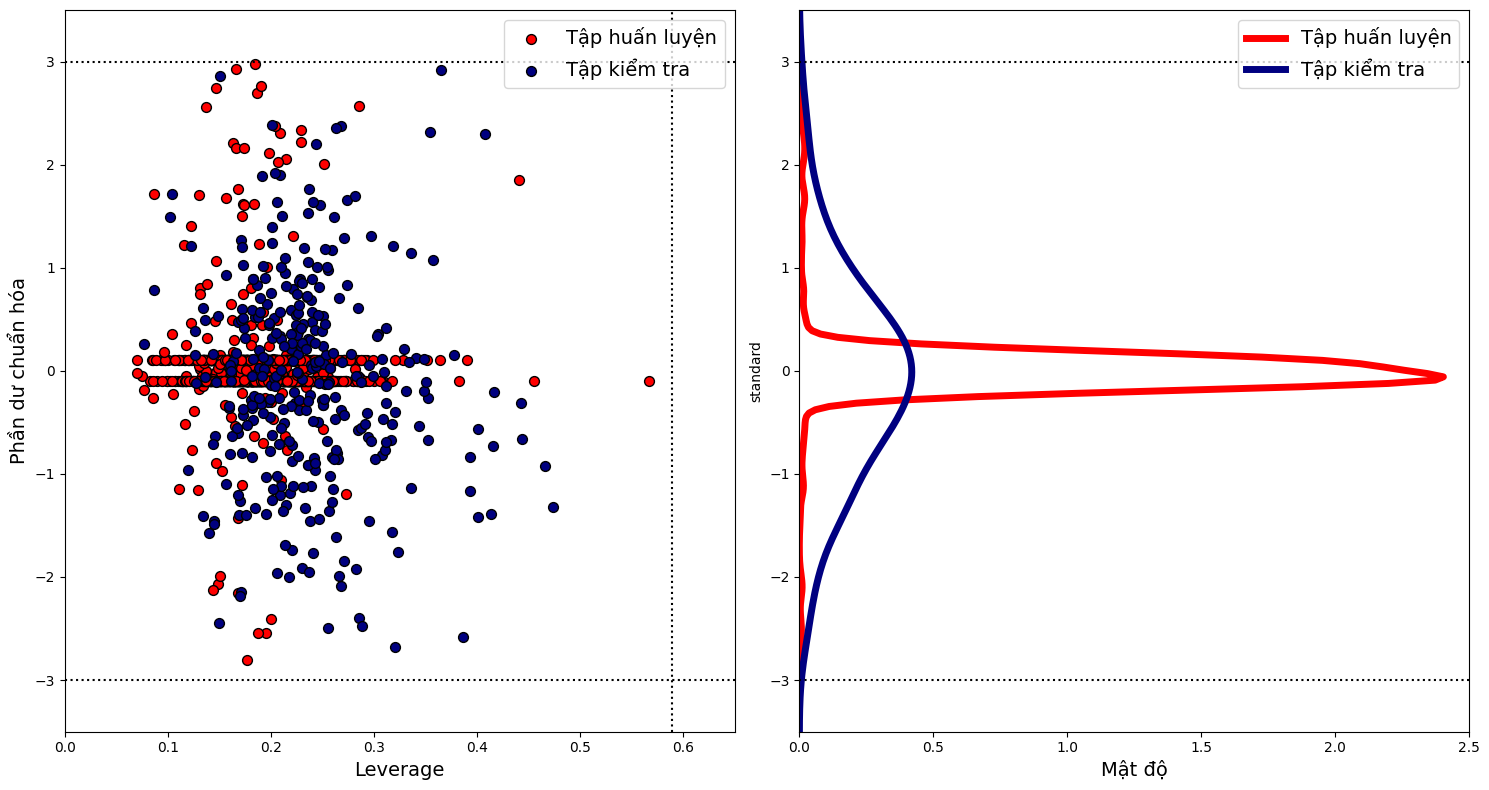

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

x_axis = y_train_train['leverage']
y_axis = y_train_train['standard']
x_axis_1 = y_test_new['leverage']
y_axis_1 = y_test_new['standard']

plt.figure(figsize=(15, 8))

# Scatter plot (left side)
plt.subplot(1, 2, 1)
plt.scatter(x_axis, y_axis, color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(x_axis_1, y_axis_1, color='navy', label='Tập kiểm tra', marker='o', s=50, edgecolors='black')
plt.xlabel('Leverage', fontsize=14)
plt.ylabel('Phần dư chuẩn hóa', fontsize=14)
plt.xlim(0, 0.65)
plt.ylim(-3.5, 3.5)
plt.axhline(y=3, color='black', linestyle='dotted')
plt.axhline(y=-3, color='black', linestyle='dotted')
plt.axvline(x =0.5889999, color='black', linestyle='dotted')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(loc='upper right', fontsize=14)


# KDE plot (right side)
plt.subplot(1, 2, 2)
sns.kdeplot(y_axis, color='red', linewidth=5, vertical=True, label='Tập huấn luyện')
sns.kdeplot(y_axis_1, color='navy', linewidth=5, vertical=True, label='Tập kiểm tra')
plt.xlabel('Mật độ', fontsize=14)
plt.ylim(-3.5,3.5)
plt.xlim(0, 2.5)
plt.axhline(y=3, color='black', linestyle='dotted')
plt.axhline(y=-3, color='black', linestyle='dotted')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(loc='upper right', fontsize=14)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

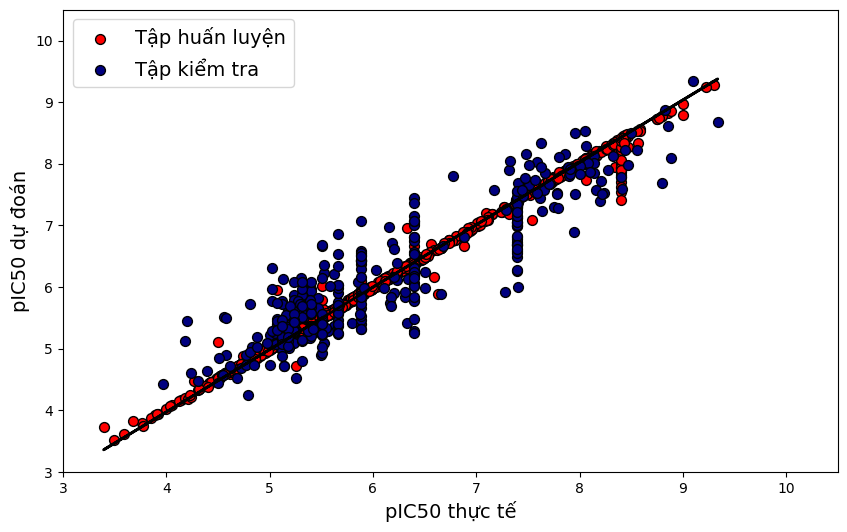

In [441]:
import numpy as np
import matplotlib.pyplot as plt

x_axis = y_train_new['pIC50']
y_axis = y_train_new['pred']

x_axis1 = y_test_new['pIC50']
y_axis1 = y_test_new['pred']

# Concatenate the data
x_combined = np.concatenate((x_axis, x_axis1))
y_combined = np.concatenate((y_axis, y_axis1))

plt.figure(figsize=(10, 6))

plt.scatter(x_axis, y_axis, color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
plt.scatter(x_axis1, y_axis1, color='navy', label='Tập kiểm tra', marker='o', s=50, edgecolors='black')

slope, intercept = np.polyfit(y_combined, x_combined, 1)
best_fit_line = slope * x_combined + intercept
plt.plot(x_combined, best_fit_line, color='black', linewidth=2.0)

plt.xlabel('pIC50 thực tế', fontsize=14)
plt.ylabel('pIC50 dự đoán', fontsize=14)
plt.xlim(3, 10.5)  # Set the x-axis limits
plt.ylim(3, 10.5)  # Set the y-axis limits

legend = plt.legend(loc='upper left', fontsize=14)
plt.show()

In [442]:
slope

1.0130674653657896

In [399]:
morgan_new = morgan.drop(indice_test)
morgan_new

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,1,0,1,0,0,1
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1687,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1688,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1689,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [99]:
Day1 = pd.read_csv('Dãy 1.csv')
Day2 = pd.read_csv('Dãy 2.csv')
Day3 = pd.read_csv('Dãy 3.csv')
Day4 = pd.read_csv('Dãy 4.csv')
Day5 = pd.read_csv('Dãy 5.csv')
Day6 = pd.read_csv('Dãy 6.csv')
Day7 = pd.read_csv('Dãy 7.csv')

In [90]:
day = pd.concat([Day1, Day2, Day3, Day4, Day5, Day6, Day7])

In [91]:
day

,SMILES
0,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
1,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
2,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
3,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
4,COC1=NC(C(C(C=C(CCN2C(C)=CN=C2)C=C3)=C3C(CC4=C...
...,...
15115,O=C(N(CCC1=CC(OC)=C(OCCCC2=CC=C(OC)C(OC)=C2OC)...
15116,O=C(N(CCC1=CC(OC)=C(OCCCC2=C(OC)C=C(OC)C=C2OC)...
15117,O=C(N(CCC1=CC(OC)=C(OCCCC2=CC=CC=N2)C=C1)C3=NC...
15118,O=C(N(CCC1=CC(OC)=C(OCCCC2=CC=CN=C2)C=C1)C3=NC...


In [97]:
for indexss, rowss in Day1.iterrows():
    smilesss = rowss['SMILES']
    molss = Chem.MolFromSmiles(smilesss)
    fpss = AllChem.GetMorganFingerprintAsBitVect(molss, 4, nBits=256)
    Day1.at[indexss, 'fp'] = fpss
for indexss, rowss in Day2.iterrows():
    smilesss = rowss['SMILES']
    molss = Chem.MolFromSmiles(smilesss)
    fpss = AllChem.GetMorganFingerprintAsBitVect(molss, 4, nBits=256)
    Day2.at[indexss, 'fp'] = fpss
for indexss, rowss in Day3.iterrows():
    smilesss = rowss['SMILES']
    molss = Chem.MolFromSmiles(smilesss)
    fpss = AllChem.GetMorganFingerprintAsBitVect(molss, 4, nBits=256)
    Day3.at[indexss, 'fp'] = fpss
for indexss, rowss in Day4.iterrows():
    smilesss = rowss['SMILES']
    molss = Chem.MolFromSmiles(smilesss)
    fpss = AllChem.GetMorganFingerprintAsBitVect(molss, 4, nBits=256)
    Day4.at[indexss, 'fp'] = fpss
for indexss, rowss in Day5.iterrows():
    smilesss = rowss['SMILES']
    molss = Chem.MolFromSmiles(smilesss)
    fpss = AllChem.GetMorganFingerprintAsBitVect(molss, 4, nBits=256)
    Day5.at[indexss, 'fp'] = fpss
for indexss, rowss in Day6.iterrows():
    smilesss = rowss['SMILES']
    molss = Chem.MolFromSmiles(smilesss)
    fpss = AllChem.GetMorganFingerprintAsBitVect(molss, 4, nBits=256)
    Day6.at[indexss, 'fp'] = fpss
for indexss, rowss in Day7.iterrows():
    smilesss = rowss['SMILES']
    molss = Chem.MolFromSmiles(smilesss)
    fpss = AllChem.GetMorganFingerprintAsBitVect(molss, 4, nBits=256)
    Day7.at[indexss, 'fp'] = fpss

In [77]:
df1 = df.drop(indice_test)
df2 = df1.drop(indice_train1)
df3 = pd.DataFrame(df2.SMILES)
df3

,SMILES
0,S=C(NCCCN1C(C)=CN=C1)NC2=CC=C(OC)C(OC)=C2
1,S=C(NCCCN1C(C)=CN=C1)NC2=CC=C(OCO3)C3=C2
2,S=C(NCCCN1C(C)=CN=C1)NC2=CC=C(OCC3)C3=C2
3,S=C(NCCCN1C(C)=CN=C1)NC2=CC=C(CCO3)C3=C2
4,S=C(NCCCN1C(C)=CN=C1)NC2=CC=C3C(CCCO3)=C2
...,...
1684,O=C1C(O)=C(C(C2=CC=CC=C2)=O)C(C3=C(F)C(F)=CC=C...
1685,O=C1C(O)=C(C)C(C2=CC=CC(F)=C2F)N1C3=CC=C(NC=N4...
1687,O=C1C(O)=C(C)C(C2=CC(F)=C(F)C=C2F)N1C3=CC=C(NC...
1689,O=C1C(O)=C(C)C(C2=C(Cl)C(F)=CC=C2F)N1C3=CC=C(N...


In [100]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import base64
import matplotlib.pyplot as plt
from io import BytesIO
import pandas as pd
import numpy as np
import seaborn as sn
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

PandasTools.AddMoleculeColumnToFrame(Day1, 'SMILES', 'Molecule')
PandasTools.AddMoleculeColumnToFrame(Day2, 'SMILES', 'Molecule')
PandasTools.AddMoleculeColumnToFrame(Day3, 'SMILES', 'Molecule')
PandasTools.AddMoleculeColumnToFrame(Day4, 'SMILES', 'Molecule')
PandasTools.AddMoleculeColumnToFrame(Day5, 'SMILES', 'Molecule')
PandasTools.AddMoleculeColumnToFrame(Day6, 'SMILES', 'Molecule')
PandasTools.AddMoleculeColumnToFrame(Day7, 'SMILES', 'Molecule')


mfpts_2 = generate_fpts(Day2.Molecule)
def generate_fpts(data):
    Mfpts_2 = []
    for mol in tqdm(data):
        mfpt_2 = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=256)
        Mfpts_2.append(mfpt_2)

    return np.array(Mfpts_2)

day_1 = generate_fpts(Day1.Molecule)
day_2 = generate_fpts(Day2.Molecule)
day_3 = generate_fpts(Day3.Molecule)
day_4 = generate_fpts(Day4.Molecule)
day_5 = generate_fpts(Day5.Molecule)
day_6 = generate_fpts(Day6.Molecule)
day_7 = generate_fpts(Day7.Molecule)

100%|██████████| 15120/15120 [00:04<00:00, 3767.77it/s]


In [104]:
dayy_1 = pd.DataFrame(day_1)
dayy_2 = pd.DataFrame(day_2)
dayy_3 = pd.DataFrame(day_3)
dayy_4 = pd.DataFrame(day_4)
dayy_5 = pd.DataFrame(day_5)
dayy_6 = pd.DataFrame(day_6)
dayy_7 = pd.DataFrame(day_7)


In [107]:
day = pd.concat([X_train_new, X_test_new, dayy_1, dayy_2, dayy_3, dayy_4, dayy_5, dayy_6, dayy_7])
day = day.reset_index(drop=True)
day

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,1,...,1,0,0,1,1,0,1,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43225,1,1,0,1,1,1,1,1,0,0,...,0,1,0,1,0,0,0,1,1,1
43226,1,1,0,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
43227,1,1,0,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
43228,1,1,0,1,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [40]:
data = pd.concat([X_train_new, X_test_new])

In [37]:
def calc_tanimoto(fp1, fp2):
    tc = DataStructs.TanimotoSimilarity(fp1, fp2)
    return round(tc,2)

In [78]:
for indexss, rowss in df3.iterrows():
    smilesss = rowss['SMILES']
    molss = Chem.MolFromSmiles(smilesss)
    fpss = AllChem.GetMorganFingerprintAsBitVect(molss, 4, nBits=256)
    df3.at[indexss, 'fp'] = fpss

In [168]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity = 30.0, early_exaggeration=12.0, learning_rate=200, n_iter=1000,
            n_iter_without_progress=300,min_grad_norm=1e-07, metric='jaccard', random_state=78)
X_tsne_train = tsne.fit_transform(day)

tsne.kl_divergence_

1.7283375263214111

In [169]:
X_tsnefull = pd.DataFrame(X_tsne_train)
X_train = np.array(X_tsnefull.iloc[0:1309])
X_test = np.array(X_tsnefull.iloc[1309:1638])
X1 = np.array(X_tsnefull.iloc[1638:6242])
X_tsne_2 = np.array(X_tsnefull.iloc[6242:8312])
X_tsne_3 = np.array(X_tsnefull.iloc[8312:18308])
X_tsne_4 = np.array(X_tsnefull.iloc[18308:21188])
X_tsne_5 = np.array(X_tsnefull.iloc[21188:23568])
X_tsne_6 = np.array(X_tsnefull.iloc[23568:28650])
X_tsne_7 = np.array(X_tsnefull.iloc[28650:43770])

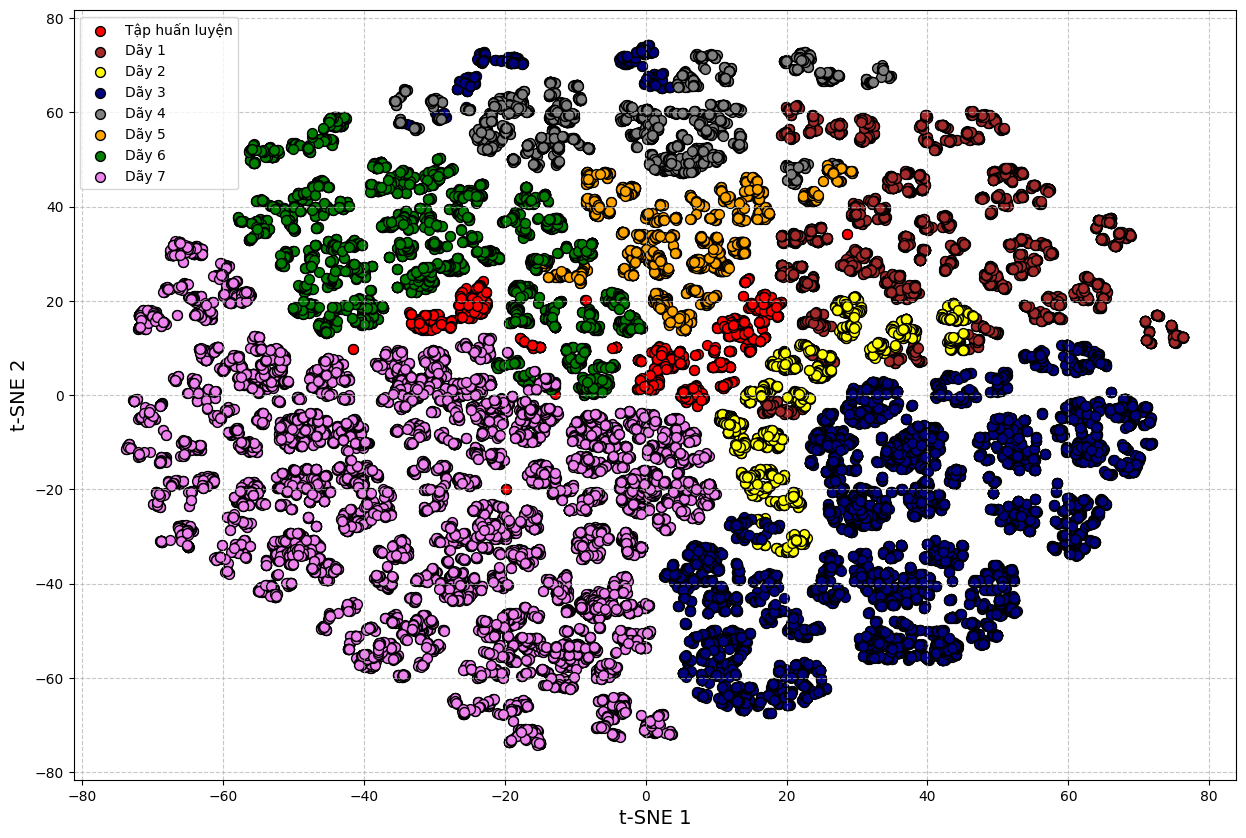

In [182]:
plt.figure(figsize=(15,10))
plt.scatter(X_train[:, 0], X_train[:, 1], color='red', label='Tập huấn luyện', marker='o', s=50, edgecolors='black')
# plt.scatter(X_test[:, 0], X_test[:, 1], color= 'red', label='Tập kiểm tra', marker='o', s=50,edgecolors='black')
plt.scatter(X1[:, 0], X1[:, 1], color= 'brown', label='Dãy 1', marker='o', s=50,edgecolors='black')
plt.scatter(X_tsne_2[:, 0], X_tsne_2[:, 1], color= 'yellow', label='Dãy 2', marker='o', s=50,edgecolors='black')
plt.scatter(X_tsne_3[:, 0], X_tsne_3[:, 1], color= 'navy', label='Dãy 3', marker='o', s=50,edgecolors='black')
plt.scatter(X_tsne_4[:, 0], X_tsne_4[:, 1], color= 'grey', label='Dãy 4', marker='o', s=50,edgecolors='black')
plt.scatter(X_tsne_5[:, 0], X_tsne_5[:, 1], color= 'orange', label='Dãy 5', marker='o', s=50,edgecolors='black')
plt.scatter(X_tsne_6[:, 0], X_tsne_6[:, 1], color= 'green', label='Dãy 6', marker='o', s=50,edgecolors='black')
plt.scatter(X_tsne_7[:, 0], X_tsne_7[:, 1], color= 'violet', label='Dãy 7', marker='o', s=50,edgecolors='black')

plt.grid(axis='y', linestyle='--', alpha=0.7, which='both')
plt.grid(axis='x', linestyle='--', alpha=0.7, which='both')
# plt.title("t-SNE visualization")
plt.xlabel("t-SNE 1", fontsize = 14)
plt.ylabel("t-SNE 2", fontsize = 14)
legend = plt.legend( loc='upper left', fontsize=10)
plt.setp(legend.get_title(), fontsize=14, fontweight='bold')
plt.show()

In [407]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have already defined X_train and X_test
# and performed t-SNE on both datasets
tsne = TSNE(n_components=3, perplexity=30.0, early_exaggeration=12.0, learning_rate=200,
            n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', random_state=78)
X_tsne = tsne.fit_transform(morgan_new)
X_tsnefull = pd.DataFrame(X_tsne)
t1, t2, t3, t4 = train_test_split(X_tsnefull, X_tsnefull, test_size=0.2, random_state=78)
t5 = np.array(t1)
t6 = np.array(t2)

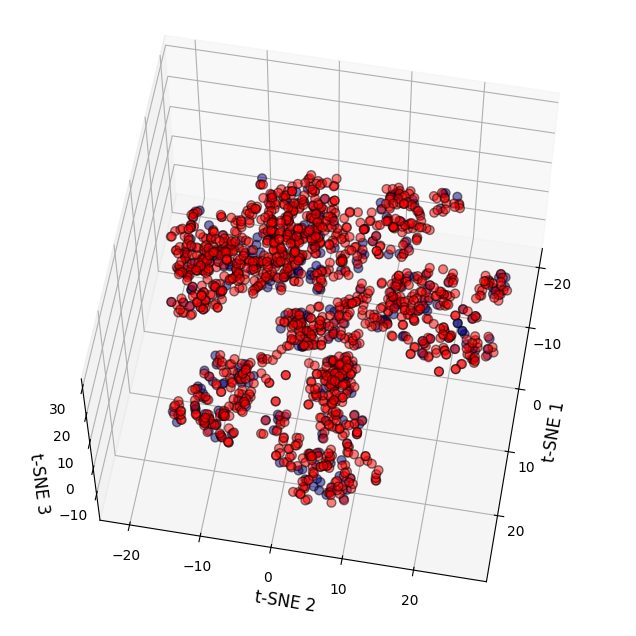

In [414]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(t5[:, 0], t5[:, 1], t5[:, 2], c='red', marker='o', s=40, alpha=0.5, edgecolor = 'black', label='Tập huấn luyện')
ax.scatter(t6[:, 0], t6[:, 1], t6[:, 2], c='navy', marker='o', s=40, alpha=0.5, edgecolor = 'black', label='Tập kiểm tra')
# ax.set_title("t-SNE Visualization", fontsize=16)
ax.set_xlabel("t-SNE 1", fontsize=12)
ax.set_ylabel("t-SNE 2", fontsize=12)
ax.set_zlabel("t-SNE 3", fontsize=12)
# ax.legend(loc='upper right', fontsize=12)
ax.grid(True, linestyle='dashed', alpha=0.5)
ax.view_init(elev=60, azim= 10)

plt.show()

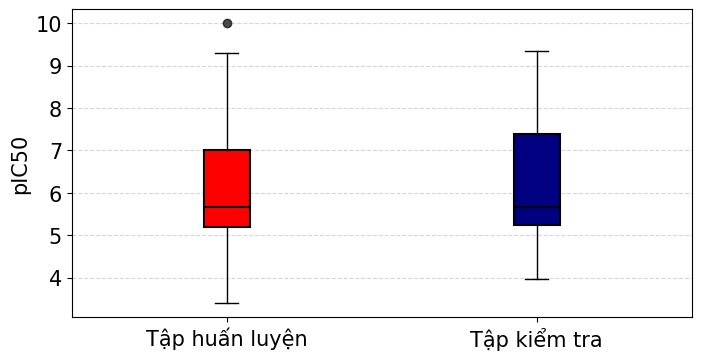

In [423]:
data = [y_train.pIC50, y_test_new.pIC50]
positions = [1, 2]
labels = ['Tập huấn luyện', 'Tập kiểm tra']
plt.figure(figsize=(8, 4))
box_plot = plt.boxplot(data, positions=positions, labels=labels, patch_artist=True)

# Define colors for each box plot
colors = ['red', 'navy']

# Customize the colors of the boxes
for box, color in zip(box_plot['boxes'], colors):
    box.set(color='black', linewidth = 1.5)
    box.set(facecolor=color)

for flier in box_plot['fliers']:
    flier.set(marker='o', color='black', alpha=0.7, markersize=6, markerfacecolor='black')

for line in box_plot["medians"]:
    line.set(color='black', linewidth = 1.5)  # Change the color to red
# Set labels and title
plt.ylabel('pIC50')

plt.ylabel('pIC50', fontsize=15)  # Adjust the fontsize as desired
plt.xticks(fontsize=15)  # Adjust the fontsize of the x-axis labels
plt.yticks(fontsize=15)  # Adjust the fontsize of the y-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.5, which='both')

# plt.box(False)
plt.gca().xaxis.grid(False)  # Remove x-axis gridline
# Display the plot

plt.show()

In [155]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
perm_importance = permutation_importance(svr, X_test_new, y_test_new)

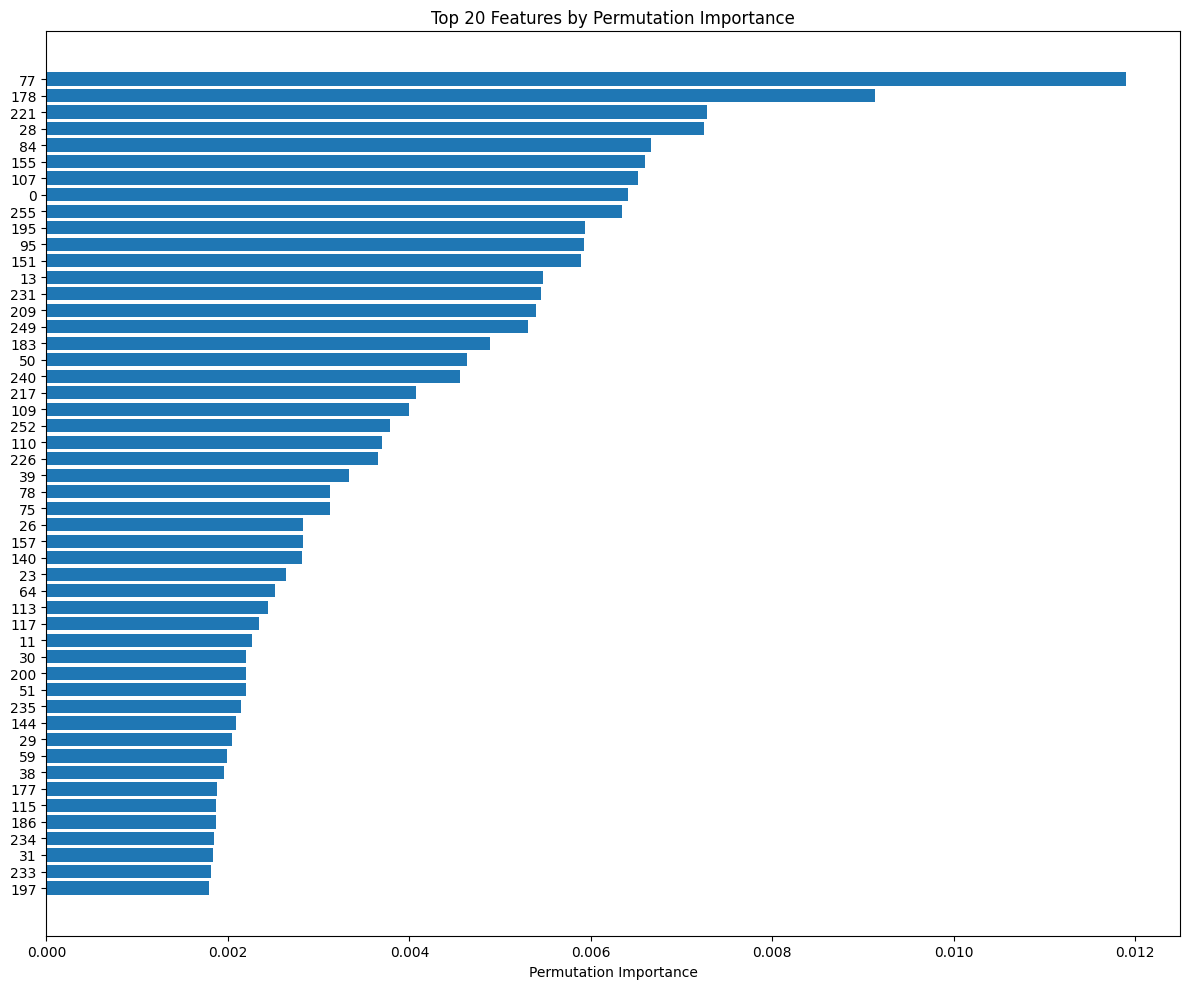

In [159]:
top_indices = np.argsort(perm_importance.importances_mean)[-50:]

# Get the importance scores and feature names for the top 20 features
top_importances = perm_importance.importances_mean[top_indices]
top_feature_names = X_test_new.columns[top_indices]

# Plotting the column graph
plt.figure(figsize=(12, 10))
plt.barh(range(len(top_importances)), top_importances, align='center')
plt.yticks(range(len(top_importances)), top_feature_names)
plt.xlabel('Permutation Importance')
plt.title('Top 20 Features by Permutation Importance')
plt.tight_layout()
plt.show()

66


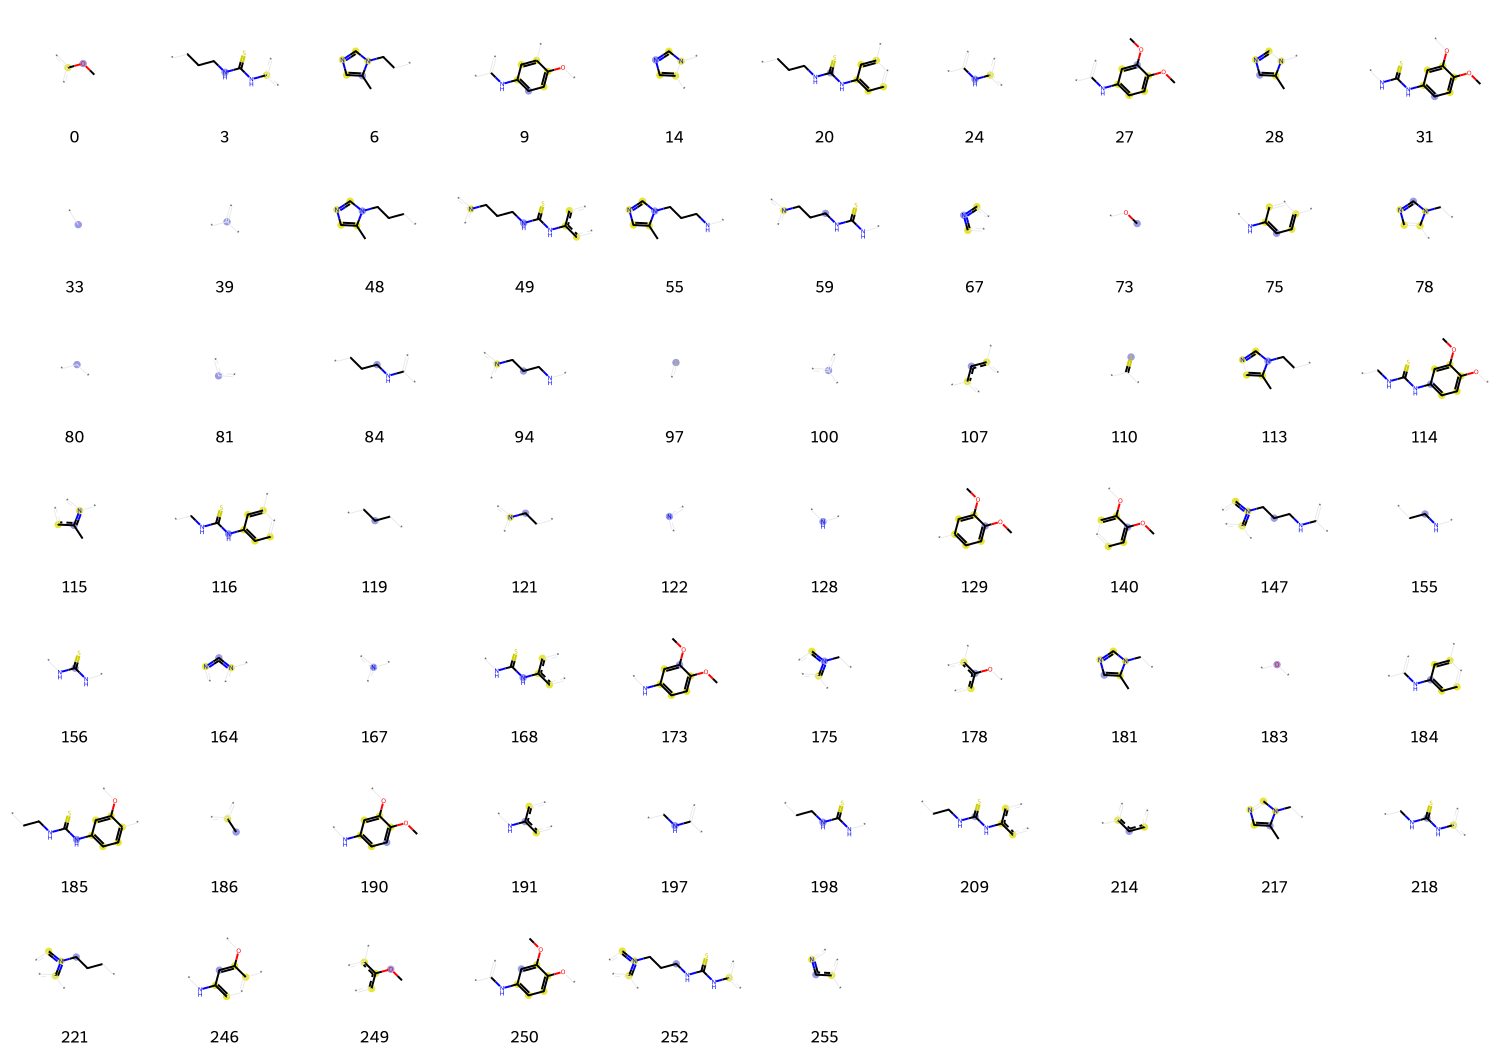

In [161]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

mol = Chem.MolFromSmiles('S=C(NCCCN1C(C)=CN=C1)NC2=CC=C(OC)C(OC)=C2')

bi1 = {}
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol, radius=4, nBits = 256, bitInfo=bi1)

print(len(list(fp1.GetOnBits())))

tpls1 = [(mol, x, bi1) for x in fp1.GetOnBits()]
Draw.DrawMorganBits(tpls1[:], molsPerRow=10, legends=[str(x) for x in fp1.GetOnBits()][:])

In [9]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import pandas as pd
import base64
import matplotlib.pyplot as plt
from io import BytesIO
%matplotlib inline
Day2 = pd.read_csv('7 new.csv')
Day2.drop_duplicates()
PandasTools.AddMoleculeColumnToFrame(Day2, 'SMILES', 'Molecule')

import pandas as pd
import numpy as np
import seaborn as sn
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def generate_fpts(data):
    Mfpts_2 = []
    for mol in tqdm(data):
        mfpt_2 = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=256)
        Mfpts_2.append(mfpt_2)

    return np.array(Mfpts_2)
mfpts_2 = generate_fpts(Day2.Molecule)

100%|██████████| 7/7 [00:00<00:00, 2352.20it/s]


In [10]:
morgan2 = pd.DataFrame(mfpts_2)

In [11]:
leverage_day2 = np.diag(morgan2@ np.linalg.pinv(X_train_new.T @ X_train_new) @ morgan2.T)

In [12]:
leverage_day2.min()

0.5337341665896215

In [13]:
y_day2 = svr.predict(morgan2)

In [14]:
y_day2.max()

7.427339690992865

In [15]:
Day2['leverage'] = leverage_day2
Day2['pIC50'] = y_day2

In [17]:
Day2.to_csv('7 new new.csv')

In [200]:
fullday = pd.read_csv('Dãy full.csv')

In [192]:
traintrain = pd.read_csv('traintrain.csv')

In [201]:
for index, row in fullday.iterrows():
    smiles = row['SMILES']
    mol = Chem.MolFromSmiles(smiles)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=256)
    fullday.at[index, 'fp'] = fp

In [193]:
for indexss, rowss in traintrain.iterrows():
    smilesss = rowss['SMILES']
    molss = Chem.MolFromSmiles(smilesss)
    fpss = AllChem.GetMorganFingerprintAsBitVect(molss, 4, nBits=256)
    traintrain.at[indexss, 'fp'] = fpss

In [141]:
def calc_tanimoto(fp1, fp2):
    tc = DataStructs.TanimotoSimilarity(fp1, fp2)
    return round(tc,2)

In [202]:
import numpy as np
y = traintrain['fp']
Y = pd.DataFrame(y)
x = fullday['fp']
X = pd.DataFrame(x)
# Create an empty matrix to store the Tanimoto coefficients
matrix = np.zeros((len(X), len(Y)))

# Compute Tanimoto coefficients for each pair of fingerprints
for i in range(len(X)):
    smiles_x = X.iloc[i, 0]
    for j in range(len(Y)):
        smiles_y = Y.iloc[j, 0]
        coefficient = calc_tanimoto(smiles_x, smiles_y)
        matrix[i, j] = coefficient

In [205]:
matrixx = pd.DataFrame(matrix)
matrixx.to_csv('matrixx.csv')

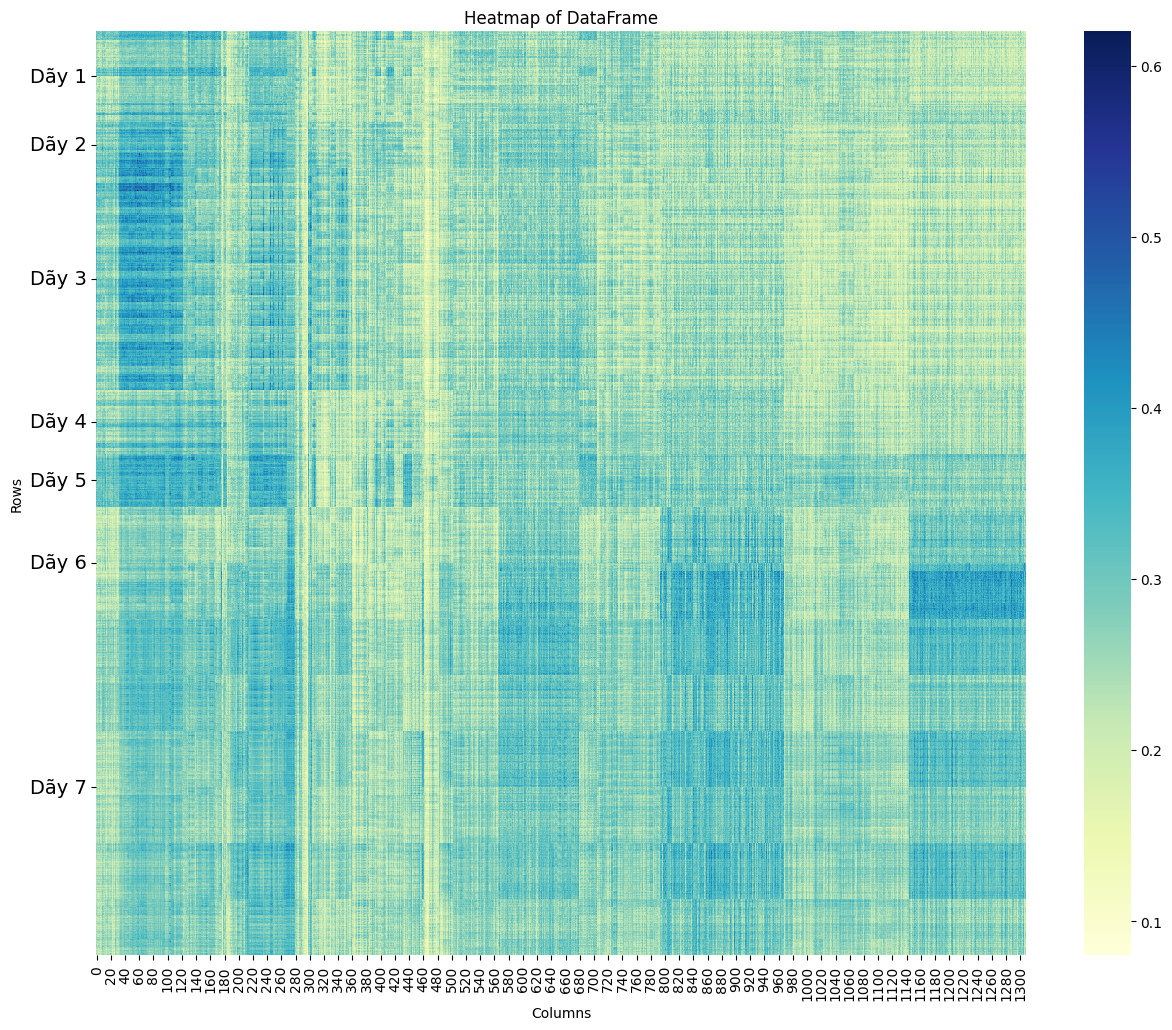

In [207]:
# Create a heatmap using seaborn
import seaborn as sns
plt.figure(figsize=(15, 12))  # Set the figure size
sns.heatmap(matrixx, cmap='YlGnBu')  # Use annot=True to show the values in each cell

plt.title('Heatmap of DataFrame')  # Set the title of the plot
plt.xlabel('Columns')  # Set the label for the x-axis
plt.ylabel('Rows')  # Set the label for the y-axis
plt.yticks(ticks=[2023, 5099, 11132, 17570,20200, 23931, 34032], labels=['Dãy 1', 'Dãy 2','Dãy 3', 'Dãy 4','Dãy 5','Dãy 6','Dãy 7'], fontsize = 14)

plt.show()  # Display the plot